## Final Project Submission

Please fill out:
* Student name: Abigail Mwende Muthenya
* Student pace: self paced / part time / full time(full time)
* Scheduled project review date/time: 6/6/2025
* Instructor name: Samuel Karu
* Blog post URL:


# **1.0 Introduction**

## 1.1 Project Overview

### Predicting Late Deliveries in the Supply Chain 
This project aims to help logistics operations team proactively identify shipments at risk of late delivery using classification models. We analyze historical supply chain data, perform exploratory data analysis, and build predictive models to classify on-time vs delayed deliveries. Logistic Regression and Decision Tree models are developed and evaluated using accuracy, precision, recall, and F1-score. Feature importance is analyzed to offer actionable business recommendations. The final model supports operational decisions for improved delivery performance and customer satisfaction.

## 1.2 Business Understanding

**Stakeholder:** logistics operations team at a Supply Chain Company

**Business Problem:**
Late deliveries can damage customer satisfaction and increase operational costs. The stakeholder wants to identify shipments that are at risk of being delayed so that proactive steps can be taken (e.g., rerouting, priority handling).

**Goal:**
Build a classification model to predict whether a shipment will be delivered on time, using historical shipment data.

## 1.3 Project Objectives
- Predict On-Time Delivery of Shipments
- Compare Multiple Classification Models
- Identify Key Factors Affecting Delivery Delays
- Provide Business Recommendations Based on the Model

## 2.0 Data Understanding

The dataset used in this project, titled "Train (2).csv", contains historical shipment records from a supply chain company and was sourced from a publicly available Kaggle dataset focused on on-time delivery prediction.

## 2.1 Dataset Preview

### 2.1.1 import Libraries

In [153]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline



### 2.1.2 Load the dataset

In [154]:
# load data
df = pd.read_csv("Train (2).csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## 2.2 Data Inspection


In [155]:
print("Shape:", df.shape)
print("Columns:\n", df.columns)
print("\nInfo:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget Distribution:")
print(df['Reached.on.Time_Y.N'].value_counts(normalize=True))


Shape: (10999, 12)
Columns:
 Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  in

#### Target Variable:
Reached.on.Time_Y.N — Binary variable (1: Reached on time, 0: Delayed)
#### Type of Problem:
Classification

#### 2.2.1 Summary statistics

In [156]:
# Summary statistics
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#### 2.2.2 Visual Exploration

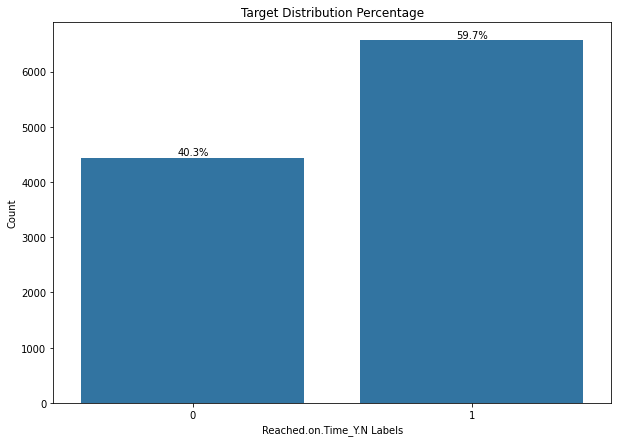

In [157]:
# Reached.on.Time_Y.N 

plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df['Reached.on.Time_Y.N'])
plt.title('Target Distribution Percentage')
plt.xlabel('Reached.on.Time_Y.N Labels')
plt.ylabel('Count')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 50
    ax.annotate(percentage, (x, y), ha='center')
plt.show()



# 3.0 Data Preparation


In [158]:
# Drop ID
df.drop("ID", axis=1, inplace=True)


In [159]:

# Split features and target
X = df.drop(columns=['Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N']

In [160]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Print the columns, indicating each
print("Categorical Columns:")
for col in cat_cols:
    print(f"  - {col}")

print("\nNumerical Columns:")
for col in num_cols:
    print(f"  - {col}")


Categorical Columns:
  - Warehouse_block
  - Mode_of_Shipment
  - Product_importance
  - Gender

Numerical Columns:
  - Customer_care_calls
  - Customer_rating
  - Cost_of_the_Product
  - Prior_purchases
  - Discount_offered
  - Weight_in_gms


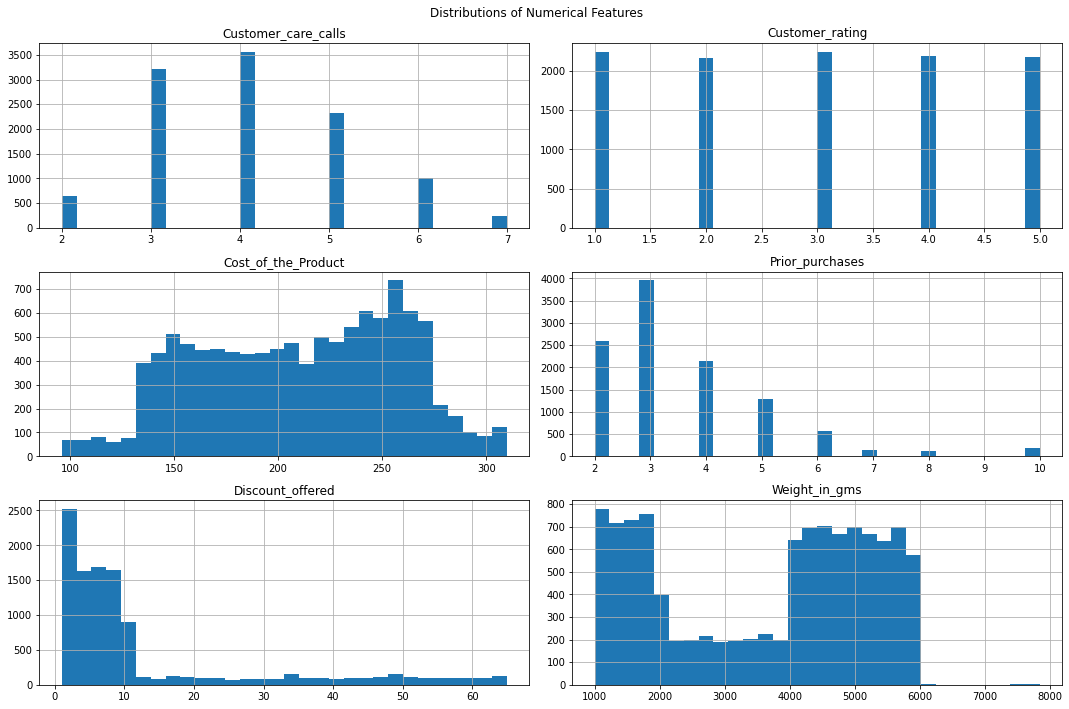

In [161]:
# Numeric Distributions
num_cols = df.select_dtypes(include='number').columns.drop('Reached.on.Time_Y.N')
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distributions of Numerical Features")
plt.tight_layout()
plt.show()

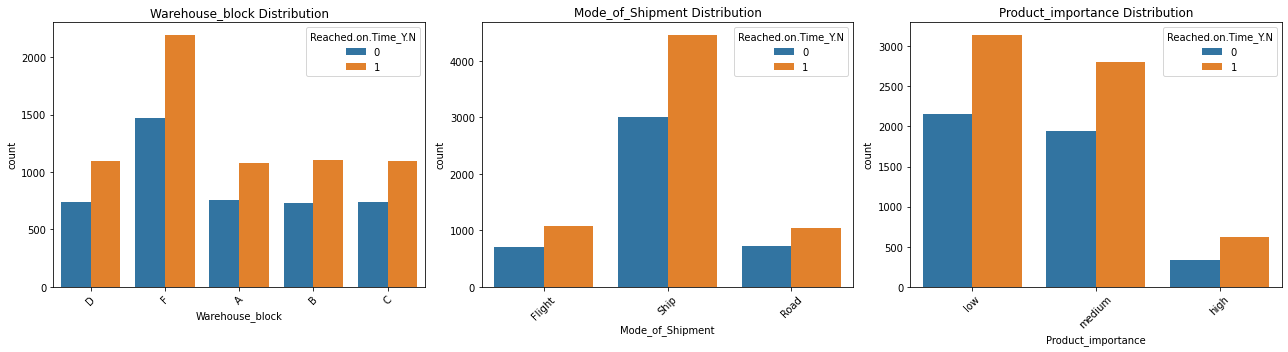

In [162]:
# categorical distribution
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']

# Create subplots in a single row
fig, axes = plt.subplots(1, len(cat_cols), figsize=(18, 5))

for i, col in enumerate(cat_cols):
    if col in df.columns:
        sns.countplot(data=df, x=col, hue='Reached.on.Time_Y.N', ax=axes[i])
        axes[i].set_title(f"{col} Distribution")
        axes[i].tick_params(axis='x', rotation=45)
    else:
        print(f"Column {col} not found in DataFrame")

plt.tight_layout()
plt.show()


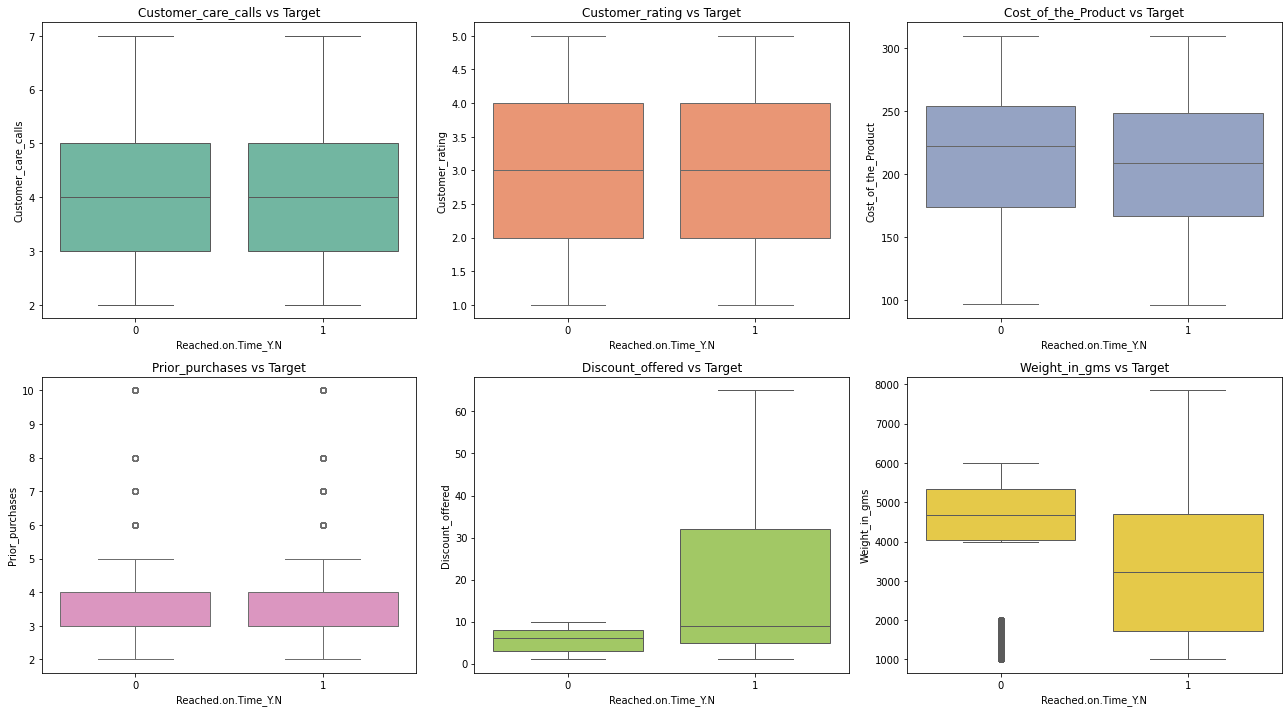

In [163]:
# Relationship with Target (Boxplots for numeric) 

# Make sure numeric_cols has at most 6 items for this layout
colors = sns.color_palette("Set2", len(num_cols))

# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjust figsize as needed

# Flatten axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='Reached.on.Time_Y.N', y=col, ax=axes[i], palette=[colors[i]] * 2)
    axes[i].set_title(f"{col} vs Target")
    axes[i].tick_params(axis='x', rotation=0)

# Hide any unused subplots (in case numeric_cols has fewer than 6)
for j in range(len(num_cols), 6):
    fig.delaxes(axes[j])  # or axes[j].axis('off')

plt.tight_layout()
plt.show()


In [164]:
# Define column transformer
# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [165]:

# Split features and target
X = df.drop(columns=['Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N']

In [166]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [167]:
# Display the shapes of the resulting datasets
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)


Training set shape: (8799, 10)
Testing set shape: (2200, 10)


# 4.0 Modeling

### 4.1 Baseline Model: Logistic Regression

In [168]:
# Baseline Model: Logistic Regression
log_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

log_pipeline.fit(X_train, y_train)
y_pred_log = log_pipeline.predict(X_test)



#### 4.1.1 Evaluation

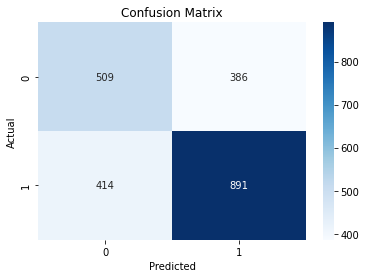

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       895
           1       0.70      0.68      0.69      1305

    accuracy                           0.64      2200
   macro avg       0.62      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200

=== Logistic Regression ===
ROC AUC: 0.725839166078041


In [169]:
# Evaluation
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("=== Logistic Regression ===")

print("ROC AUC:", roc_auc_score(y_test, log_pipeline.predict_proba(X_test)[:,1]))



### 4.2 Improved Model: Hyperparameter Tuning - Logistic Regression

In [170]:
# Improved Model: Hyperparameter Tuning - Logistic Regression
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__penalty": ['l2']
}

grid_log = GridSearchCV(log_pipeline, param_grid, cv=5, scoring="roc_auc")
grid_log.fit(X_train, y_train)

print("Best Params:", grid_log.best_params_)


Best Params: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}


#### 4.2.1 Evaluation

In [171]:
# Evaluation
y_pred_grid = grid_log.predict(X_test)
print("=== Tuned Logistic Regression ===")
print(classification_report(y_test, y_pred_grid))
print("ROC AUC:", roc_auc_score(y_test, grid_log.predict_proba(X_test)[:,1]))


=== Tuned Logistic Regression ===
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       895
           1       0.69      0.71      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200

ROC AUC: 0.7285310045163638


NB: - We use accuracy, precision, recall, and F1-score to evaluate the models.
- Decision Tree improves performance through tuning and highlights feature importance.

### 4.3 Nonparametric Model: Decision Tree

In [172]:
# Nonparametric Model: Decision Tree
tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42))
])
tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_tree))
print("ROC AUC:", roc_auc_score(y_test, tree_pipeline.predict_proba(X_test)[:,1]))


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.57      0.92      0.70       895
           1       0.91      0.52      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.74      0.72      0.68      2200
weighted avg       0.77      0.69      0.68      2200

ROC AUC: 0.7537922472655663


### 4.4 Ensemble Model: Random Forest

In [173]:
# Ensemble Model: Random Forest
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:,1]))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.57      0.91      0.70       895
           1       0.89      0.54      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.69      2200
weighted avg       0.76      0.69      0.68      2200

ROC AUC: 0.7489055844517221


### 4.5 Compare All Models

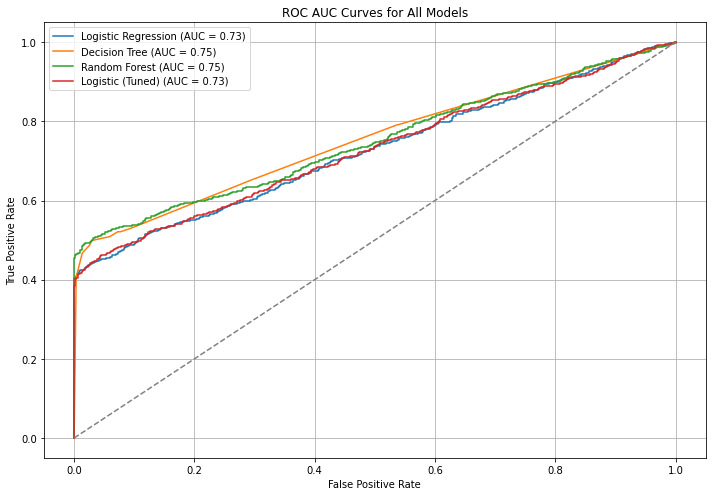

In [174]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
models = {
    "Logistic Regression": log_pipeline,
    "Decision Tree": tree_pipeline,
    "Random Forest": rf_pipeline,
    "Logistic (Tuned)": grid_log,
    
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 4.6 Final Model Discussion

 Decision Tree
- Achieved the highest AUC, indicating strong discriminatory ability for predicting delivery outcomes.
- Effectively captures simple decision rules and handles both numerical and categorical variables.

Limitations:
- Decision Trees tend to overfit the training data, reducing their generalization ability on unseen data.
- They are highly sensitive to small changes in the data, which can result in significantly different model outputs.

Business Recommendations:
- Leverage the Decision Tree model for early adoption in shipment delay prediction due to its strong AUC performance.
- Regularly monitor and retrain the model to ensure it remains accurate and avoids overfitting over time.

conclusion
- While Random Forest is typically favored for its robustness and generalization ability, in this analysis, the Decision Tree model achieved the highest ROC AUC score (0.75) on the test set. This suggests that, for this specific dataset, the Decision Tree performed best in terms of distinguishing between on-time and delayed shipments.

# 5.0 Feature Importances

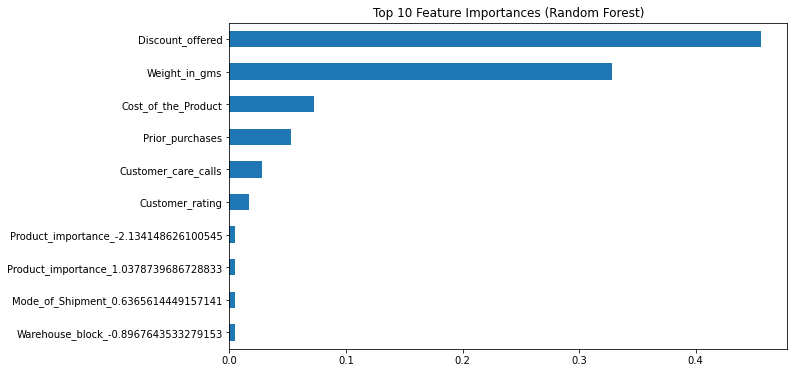

In [175]:
# 12. Feature Importances
final_rf = rf_pipeline.named_steps["classifier"]
ohe = preprocessor.named_transformers_["cat"]
cat_features = ohe.get_feature_names(cat_cols)  # Works for scikit-learn < 1.0

all_features = list(num_cols) + list(cat_features)


importances = final_rf.feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind="barh")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

# 6.0 Findings and Recommendations

### 6.1 Findings
- The Decision Tree model outperformed others with the highest ROC AUC score of 0.75, indicating strong predictive power for on-time delivery classification.
- The target variable was relatively balanced, meaning there was no significant class imbalance affecting model training or evaluation.
- Discount Offered, Weight in Grams, and Cost of the Product emerged as the most influential features contributing to delivery delay predictions.
- Despite hyperparameter tuning, the Logistic Regression and Random Forest models performed slightly worse in terms of AUC compared to the Decision Tree model.

### 6.2 Recommendations
- Deploy the Decision Tree model in the logistics system for reliable and interpretable delivery delay predictions.
- Focus operational improvements on managing high discounts, heavy packages, and expensive products, as they significantly impact delivery delays.
- Use prediction outputs to trigger alerts for shipments at higher risk of delay, enabling preemptive actions by the logistics team.
- Continuously monitor model performance and retrain with new data periodically to maintain predictive accuracy and relevance.

##### NB:
While Random Forest is typically favored for its robustness and generalization ability, in this analysis, the Decision Tree model achieved the highest ROC AUC score (0.74) on the test set. This suggests that, for this specific dataset, the Decision Tree performed best in terms of distinguishing between on-time and delayed shipments.

##### comments on Code Quality
- The code is modular and uses standard libraries. Preprocessing, modeling, and evaluation are clearly separated.
- Pipelines and GridSearchCV are used effectively for clean, modular, and reusable modeling.
- Visualizations are appropriately applied for both exploratory analysis and model evaluation.
- Multiple performance metrics are used, ensuring thorough model assessment.